# Create Graphs of All the Wells

Parse the well data from the `ALDIS2.MAC`.

In [1]:
var_map = {
"DG0":0x70+0x80,
"DG225":0x67+0x80,
"DG450":0x4F+0x80,
"DG675":0x2A+0x80,
"DG900":0x00+0x80,
"DI0":0x0F0,
"DI1":0x0B8,
"DI2":0x80,
"DI3":0x48,
"DI4":0x10,
"CR0":0x70+0x80,
"CR1":0x70+0x80,
"CR2":0x38+0x80,
"CR3":0x38+0x80,
"CR4":0x0+0x80,
"PX0":0x6C+0x80,
"PX1":0x55+0x80,
"PX2":0x31+0x80,
"PX3":0x10+0x80,
"PZ0":0x14+0x80,
"PZ1":0x30+0x80,
"PZ2":0x38+0x80,
"PZ3":0x27+0x80,
"-DG0":0xFF-(0x70+0x80),
"-DG225":0xFF-(0x67+0x80),
"-DG450":0xFF-(0x4F+0x80),
"-DG675":0xFF-(0x2A+0x80),
"-DG900":0xFF-(0x00+0x80),
"-DI0":0xFF-0x0F0,
"-DI1":0xFF-0x0B8,
"-DI2":0xFF-0x80,
"-DI3":0xFF-0x48,
"-DI4":0xFF-0x10,
"-CR0":0xFF-(0x70+0x80),
"-CR1":0xFF-(0x70+0x80),
"-CR2":0xFF-(0x38+0x80),
"-CR3":0xFF-(0x38+0x80),
"-CR4":0xFF-(0x0+0x80),
"-PX0":0xFF-(0x6C+0x80),
"-PX1":0xFF-(0x55+0x80),
"-PX2":0xFF-(0x31+0x80),
"-PX3":0xFF-(0x10+0x80),
"-PZ0":0xFF-(0x14+0x80),
"-PZ1":0xFF-(0x30+0x80),
"-PZ2":0xFF-(0x38+0x80),
"-PZ3":0xFF-(0x27+0x80),
}

In [2]:
x_data = """
  .BYTE DG0,DG225,DG450,DG675,DG900  ;CIRCLE
  .BYTE -DG675,-DG450,-DG225,-DG0
  .BYTE -DG225,-DG450,-DG675
  .BYTE DG900,DG675,DG450,DG225
    
  .BYTE DI0,DI0,DI0,DI1    ;SQUARE
  .BYTE DI2,DI3,DI4,DI4
  .BYTE DI4,DI4,DI4,DI3
  .BYTE DI2,DI1,DI0,DI0
    
  .BYTE CR0,CR1,CR2,CR3,CR4  ;CROSS
  .BYTE -CR3,-CR2,-CR1,-CR0
  .BYTE -CR1,-CR2,-CR3
  .BYTE CR4,CR3,CR2,CR1
    
  .BYTE PX0,PX1,PX2,PX3  ;PEANUT
  .BYTE -PX3,-PX2,-PX1,-PX0
  .BYTE -PX0,-PX1,-PX2,-PX3
  .BYTE PX3,PX2,PX1,PX0
    
  .BYTE 0F0,0C0,0A0,94,6C,60,40,10  ;4 KEY
  .BYTE 10,40,60,6C,94,0A0,0C0,0F0
    
  .BYTE 0D9,0C2,0AC,97,80,69,52,3C,27,10  ;TRIANGLE
  .BYTE 35,5A,80,0A6,0CA,0F0
    
  .BYTE 0EA,0E0,9C,80,64,20,16,50    ;CLOVER
  .BYTE 16,20,64,80,9C,0E0,0EA,0B0
    
  .BYTE 10,1E,2C,3A,48,56,64,70    ;V
  .BYTE 90,9E,0AC,0BA,0C8,0D6,0E4,0F0
    
  .BYTE 10,1E,2D,3C,4B,5A,69,78,87  ;PLANE
  .BYTE 96,0A5,0B4,0C3,0D2,0E1,0F0
    
  .BYTE 10,10,10,10,16,29,46,69,97  ;U
  .BYTE 0BA,0D7,0EA,0F0,0F0,0F0,0F0
    
  .BYTE 10,24,30,36,3E,49,5A,75  ;JAGGED
  .BYTE 94,0A4,0AC,0BA,0DA,0E2,0EA,0F0

  .BYTE 80,70,48,20  ;LYING 8
  .BYTE 10,20,48,70
  .BYTE 80,90,0B8,0E0
  .BYTE 0F0,0E0,0B8,90

  .BYTE 0DA,0A4,87,80,79,5C,26,10  ;HEART
  .BYTE 10,20,48,80,0B8,0E0,0F0,0F0

  .BYTE 10,10,30,30,50,50,70,70  ;STAIRCASE
  .BYTE 90,90,0B0,0B0,0D0,0D0,0F0,0F0
    
  .BYTE 0B0,80,50,47,18,30,18,47    ;STAR
  .BYTE 50,80,0B0,0B9,0E8,0D4,0E8,0B9
    
  .BYTE 10,1E,21,28,3C,55,66,73    ;WAVE
  .BYTE 8D,9A,0AB,0C4,0D8,0DF,0E2,0F0
  
"""
y_data = """
  .BYTE DG900,DG675,DG450,DG225,DG0  ;CIRCLE
  .BYTE DG225,DG450,DG675,DG900
  .BYTE -DG675,-DG450,-DG225,-DG0
  .BYTE -DG225,-DG450,-DG675
  
  .BYTE DI2,DI1,DI0,DI0 ; SQUARE
  .BYTE DI0,DI0,DI0,DI1
  .BYTE DI2,DI3,DI4,DI4
  .BYTE DI4,DI4,DI4,DI3

    .BYTE CR4,CR3,CR2,CR1,CR0  ;CROSS
  .BYTE CR1,CR2,CR3,CR4
  .BYTE -CR3,-CR2,-CR1,-CR0
  .BYTE -CR1,-CR2,-CR3
  
  .BYTE PZ0,PZ1,PZ2,PZ3    ;PEANUT
  .BYTE PZ3,PZ2,PZ1,PZ0
  .BYTE -PZ0,-PZ1,-PZ2,-PZ3
  .BYTE -PZ3,-PZ2,-PZ1,-PZ0
    
  .BYTE 96,0A3,0C5,0F0,0F0,0C5,0A3,96  ;4 KEY
  .BYTE 6A,5D,3B,10,10,3B,5D,6A
    
  .BYTE 3D,6A,97,0C4,0F0,0C4,97,6A,3D  ;TRIANGLE
  .BYTE 10,10,10,10,10,10,10
    
  .BYTE 0A0,0E0,0EA,0B0,0EA,0E0,0A0,80  ;CLOVER
  .BYTE 60,20,16,50,16,20,60,80
    
  .BYTE 0F0,0D0,0B0,90  ;V
  .BYTE 70,50,30,10
  .BYTE 10,30,50,70
  .BYTE 90,0B0,0D0,0F0
    
    .BYTE 40,40,40,40,40,40,40,40 ;PLANE
    .BYTE 40,40,40,40,40,40,40,40

  .BYTE 0F0,0CB,0A6,80,5C,39,20,12  ;U
  .BYTE 12,20,39,5C,80,0A6,0CB,0F0
    
  .BYTE 0C0,0A6,8A,6A,4A,2F,14,24  ;JAGGED
  .BYTE 20,39,59,75,72,90,0B0,0D0
    
  .BYTE 80,57,48,57  ;BIG 8
  .BYTE 80,0A9,0BA,0A9
  .BYTE 80,57,48,57
  .BYTE 80,0A9,0BA,0A9
    
  .BYTE 0E4,0E8,0B7,80,0B7,0E8,0E4,0B2  ;HEART
  .BYTE 7A,47,20,10,20,47,7A,0B2
    
  .BYTE 90,70,70,50,50,30,30,10  ;STAIRCASE
  .BYTE 10,30,30,50,50,70,70,90
    
  .BYTE 0E6,0D0,0E6,0B9,0AE,80,52,47  ;STAR
  .BYTE 14,30,14,47,52,80,0AE,0B9
    
  .BYTE 7E,6A,51,3A,2C,2C,38,4E    ;WAVE
  .BYTE 4E,38,2C,2C,3A,51,6A,7E
    
"""
"""
HOLRAP:	
    .BYTE 0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,-1,0,-1	;PLANAR(-1)/CLOSED(0) FLAG
"""
# tells us whether the well is open or closed.
closed = [0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,-1,0,-1]

A function for parsing the well data.

In [3]:
def parse_vector_data(data):
    arrays = []
    vals = []
    for l in data.splitlines()[1:]:
        if not l.strip():
            arrays += [(nm,vals)]
            vals = []
            continue
        if ';' in l:
            nm = l.split(';')[1].strip()
        dt = [x for x in l.split(' ') if x][1]
        ls = [var_map[x] if x in var_map else int(x,16) for x in dt.split(',')]
        vals += ls
    return arrays


## Create Dot Visual

CIRCLE [240 231 207 170 128  85  48  24  15  24  48  85 128 170 207 231 240] [128 170 207 231 240 231 207 170 128  85  48  24  15  24  48  85 128]
SQUARE [240 240 240 184 128  72  16  16  16  16  16  72 128 184 240 240 240] [128 184 240 240 240 240 240 184 128  72  16  16  16  16  16  72 128]
CROSS [240 240 184 184 128  71  71  15  15  15  71  71 128 184 184 240 240] [128 184 184 240 240 240 184 184 128  71  71  15  15  15  71  71 128]
PEANUT [236 213 177 144 111  78  42  19  19  42  78 111 144 177 213 236 236] [148 176 184 167 167 184 176 148 107  79  71  88  88  71  79 107 148]
4 KEY [240 192 160 148 108  96  64  16  16  64  96 108 148 160 192 240 240] [150 163 197 240 240 197 163 150 106  93  59  16  16  59  93 106 150]
TRIANGLE [217 194 172 151 128 105  82  60  39  16  53  90 128 166 202 240 217] [ 61 106 151 196 240 196 151 106  61  16  16  16  16  16  16  16  61]
CLOVER [234 224 156 128 100  32  22  80  22  32 100 128 156 224 234 176 234] [160 224 234 176 234 224 160 128  96  32 

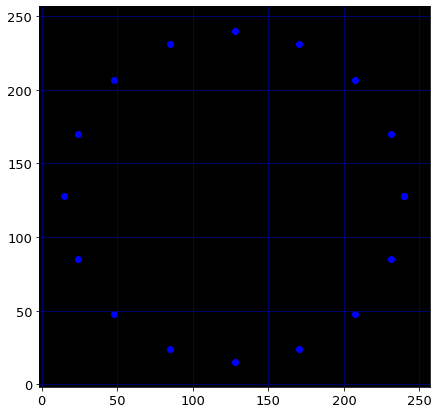

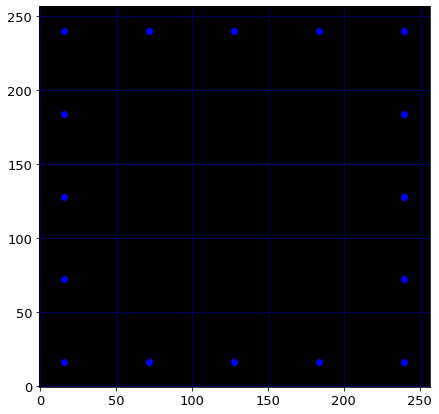

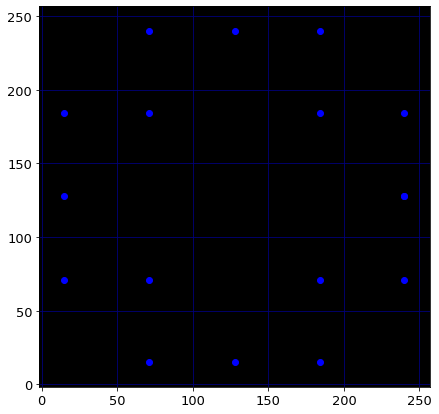

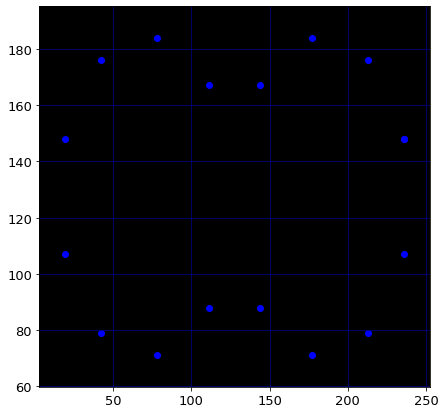

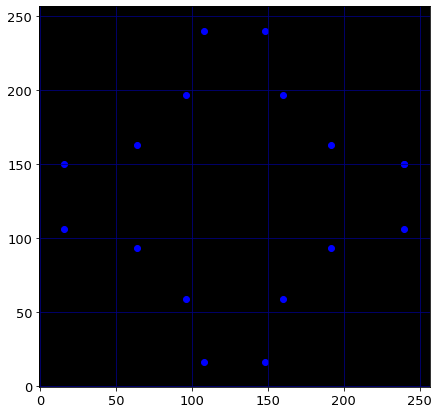

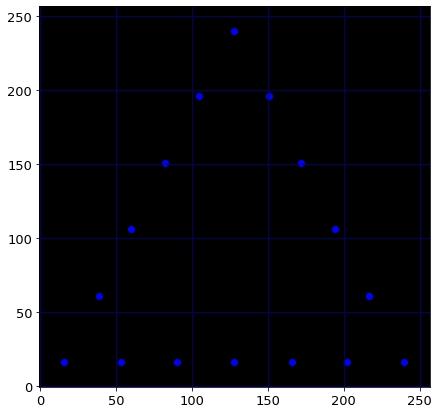

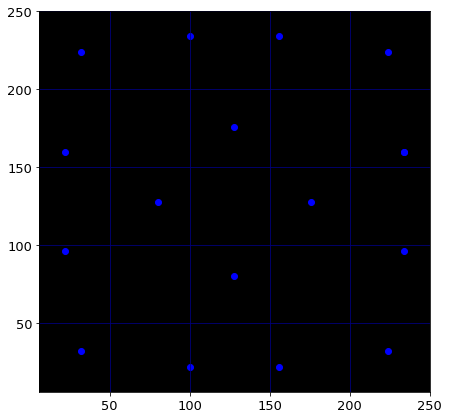

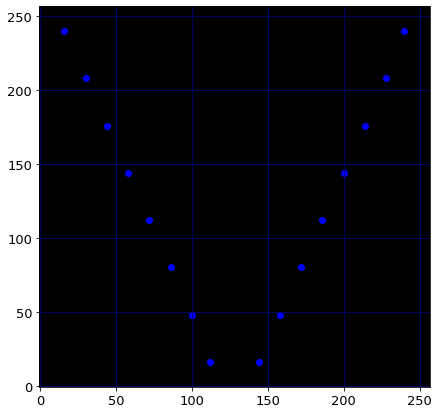

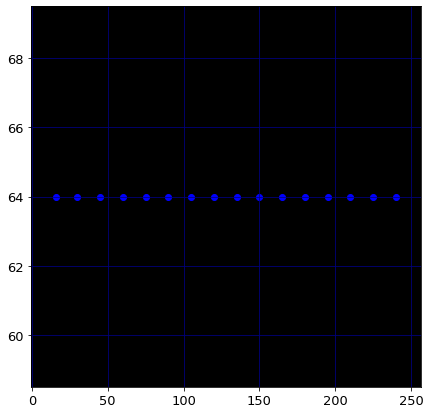

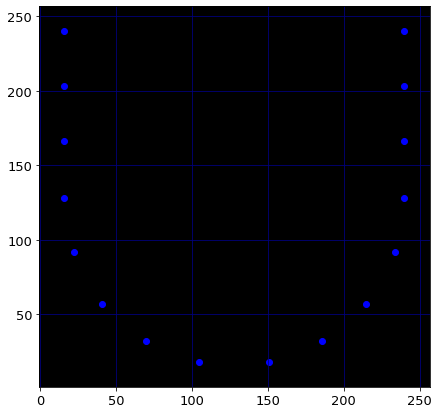

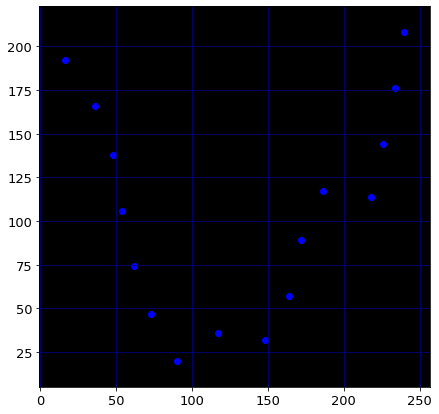

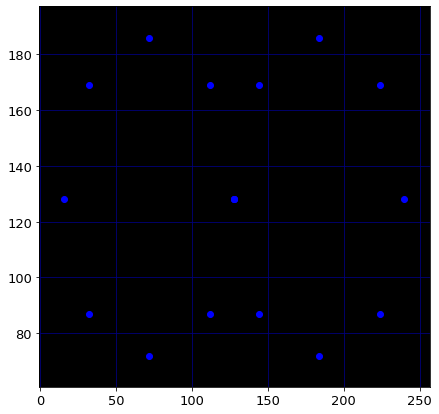

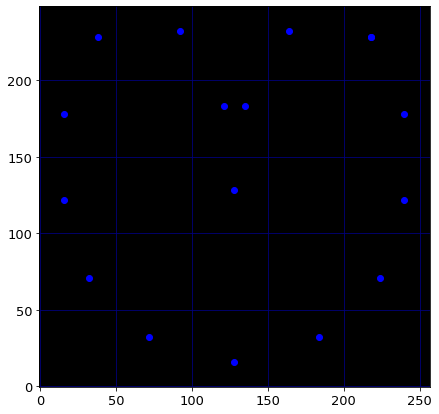

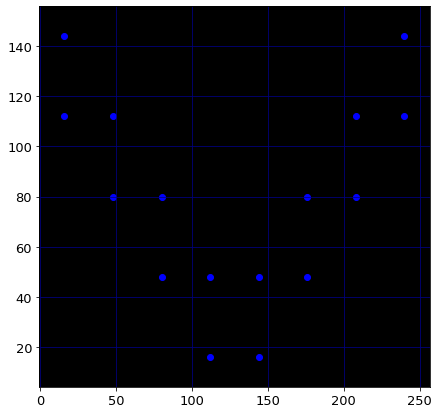

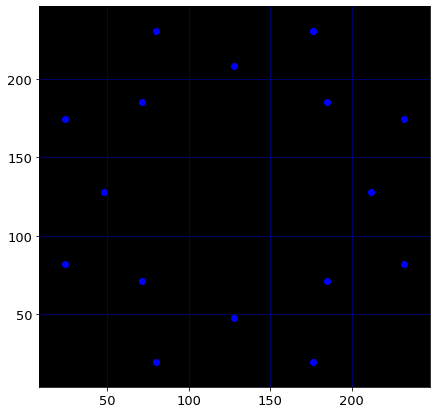

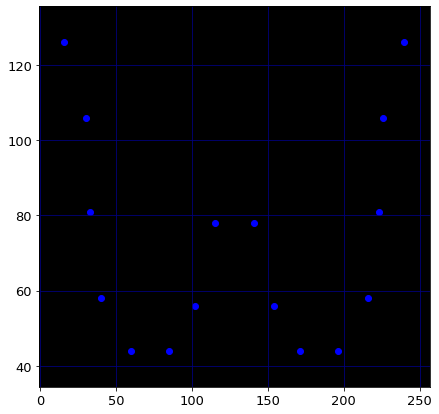

In [18]:
from matplotlib import pyplot as plt
from well_graphs import create3DVertices,makeFullGraph,create2DVertices
x_vecs = parse_vector_data(x_data)
y_vecs = parse_vector_data(y_data)

for i in range(0,len(x_vecs)):
    xnm,xs = x_vecs[i]
    ynm,ys = y_vecs[i]
    planar = closed[i]
    vertices = list(zip(xs,ys))
    xs,ys,z_ = create2DVertices(vertices,planar)
    print(xnm,xs,ys)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, facecolor='black')
    ax.grid()
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.scatter(xs, ys, color="blue")
    plt.rcParams['grid.color'] = "navy"
    ax.dataLim.y0 = min(ys) - 5
    ax.dataLim.y1 = max(ys) + 5
    ax.dataLim.x0 = min(xs) - 5
    ax.dataLim.x1 = max(xs) + 5
    plt.savefig(f"well_graphs/{xnm.replace(' ','_')}_dots_no_title.png", bbox_inches='tight')

    

## Create 2D Visual

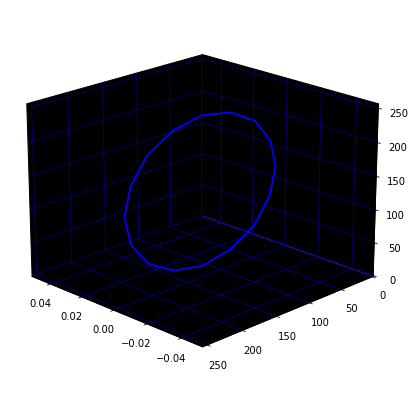

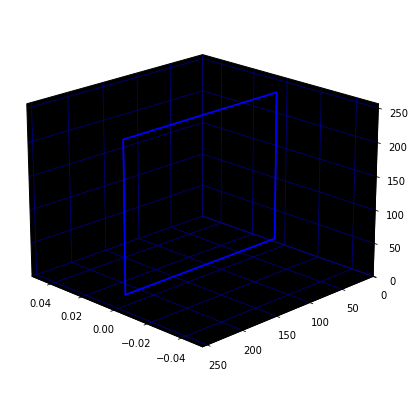

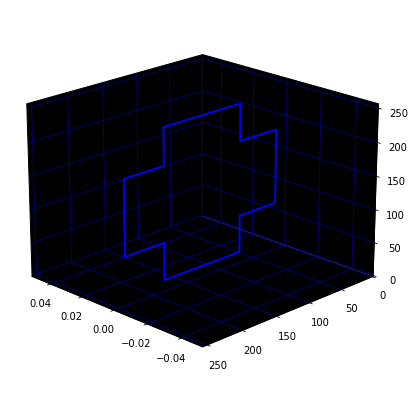

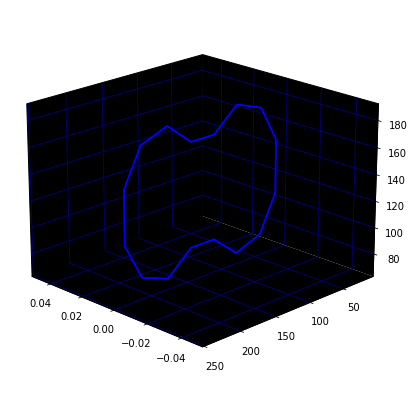

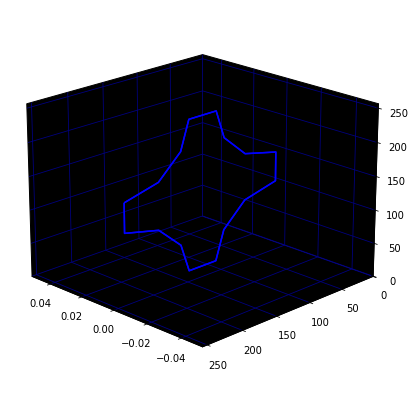

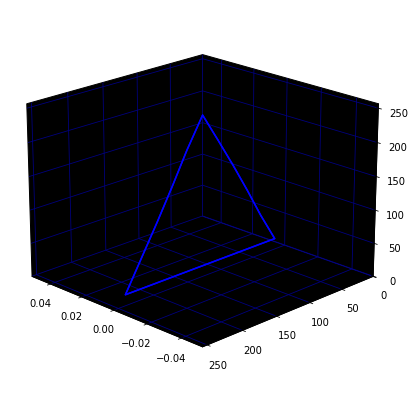

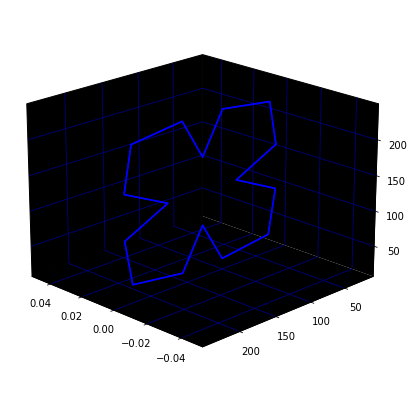

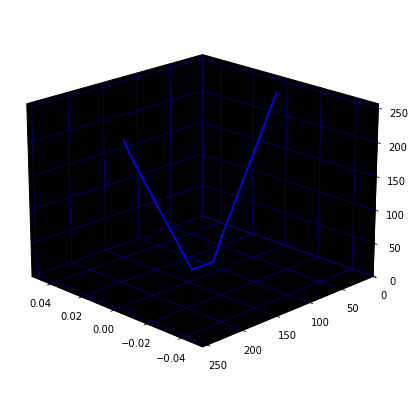

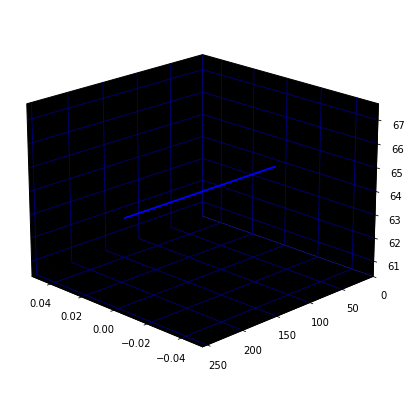

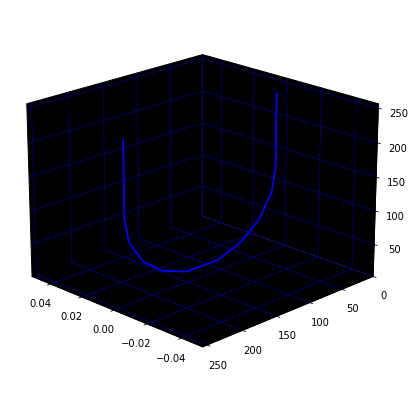

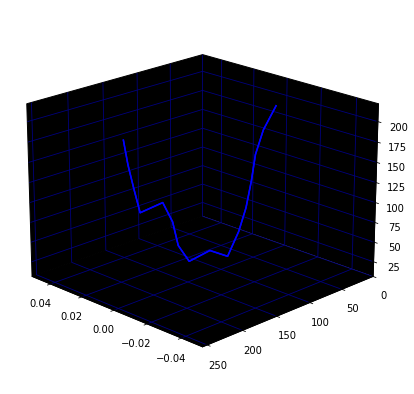

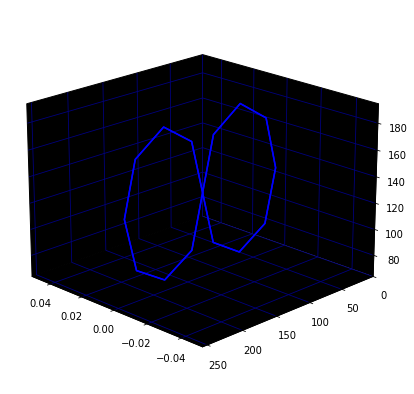

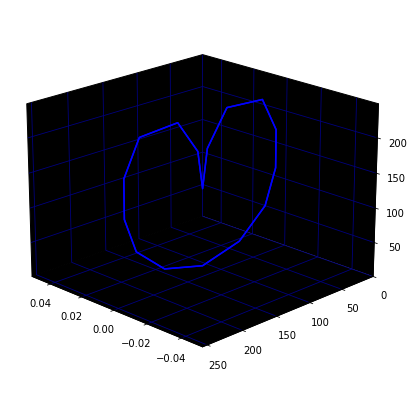

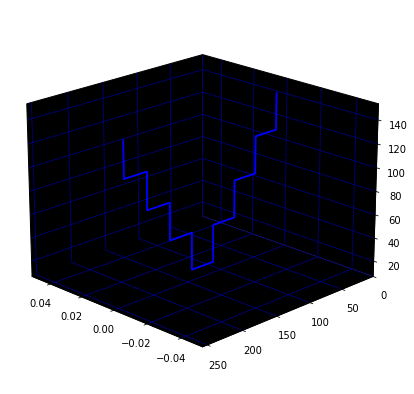

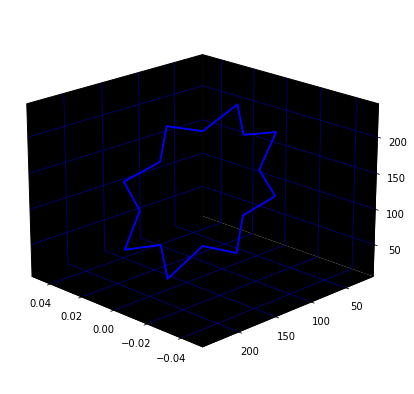

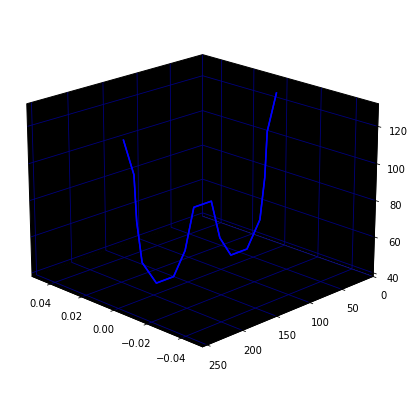

In [15]:
from well_graphs import create3DVertices,makeFullGraph,create2DVertices
x_vecs = parse_vector_data(x_data)
y_vecs = parse_vector_data(y_data)

for i in range(0,len(x_vecs)):
    xnm,xs = x_vecs[i]
    ynm,ys = y_vecs[i]
    planar = closed[i]
    vertices = list(zip(xs,ys))
    x,y,z = create2DVertices(vertices,planar)
    #print(".BYTE "+ ','.join([f"{x:02x}" if x < 129 else f"{x:03x}" for x in xs]), planar)
    #print(xs,xnm)
    #print(".BYTE "+ ','.join([f"{x:02x}" if x < 129 else f"{x:03x}" for x in ys]))
    #print(ys,ynm)
    makeFullGraph(x,y,z, f"well_graphs/{xnm}_2d.png")


## Make 3D Visuals

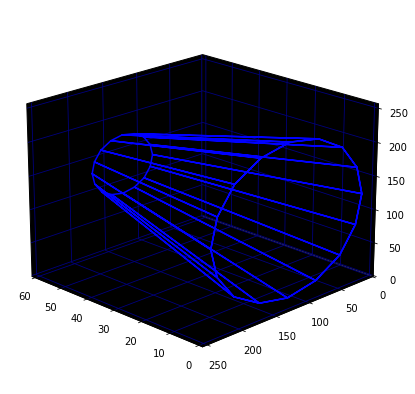

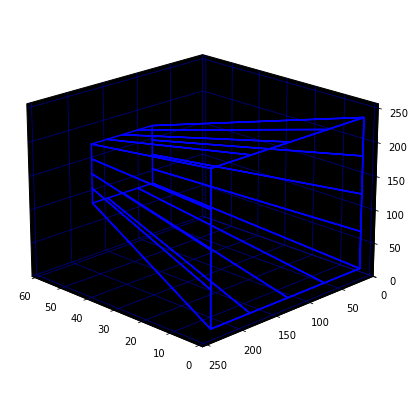

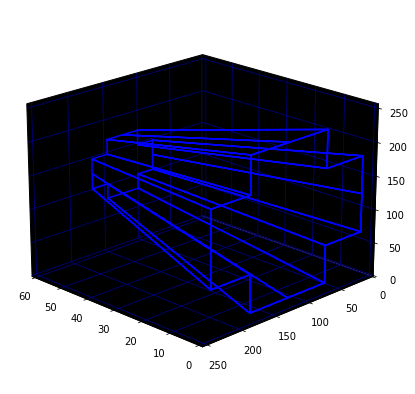

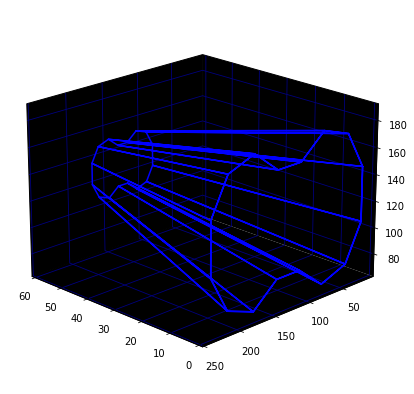

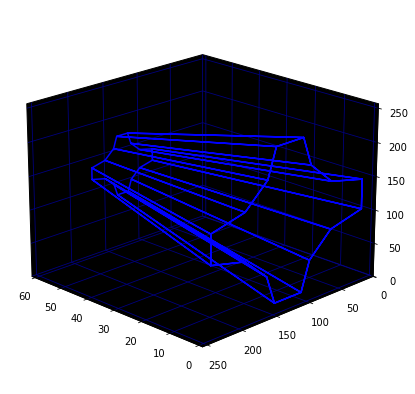

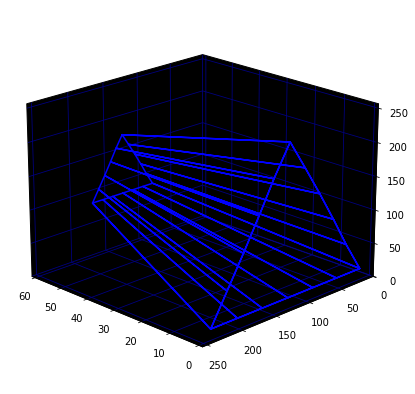

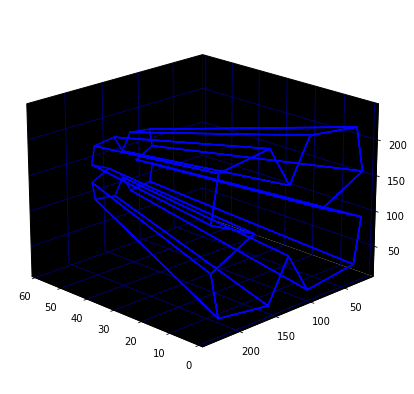

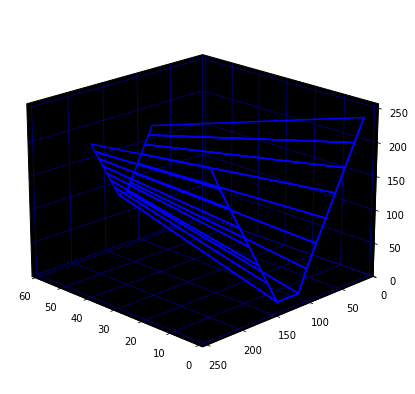

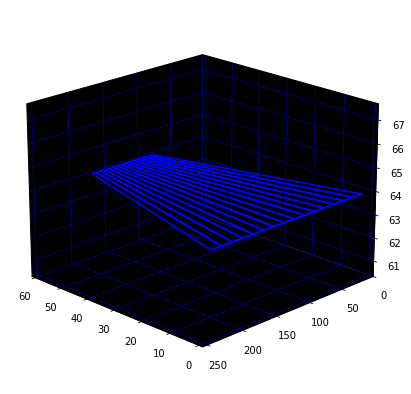

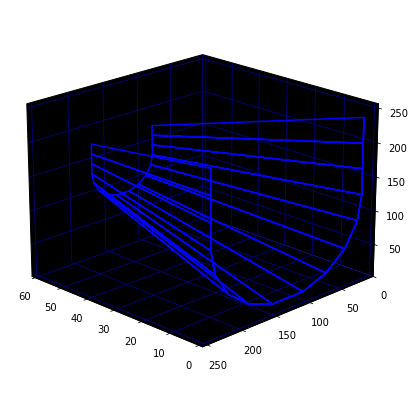

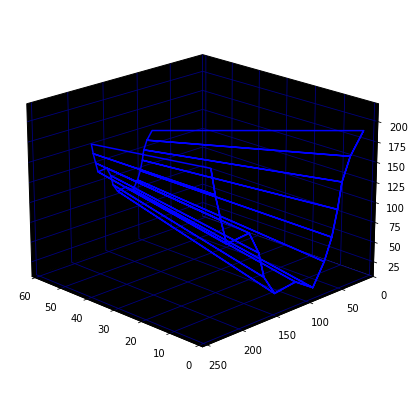

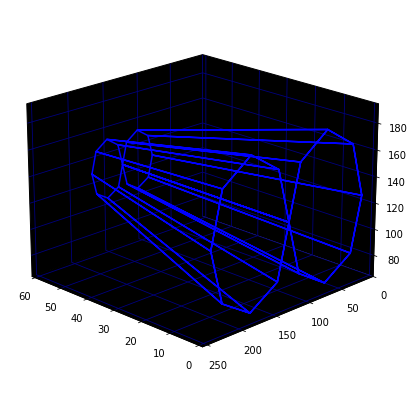

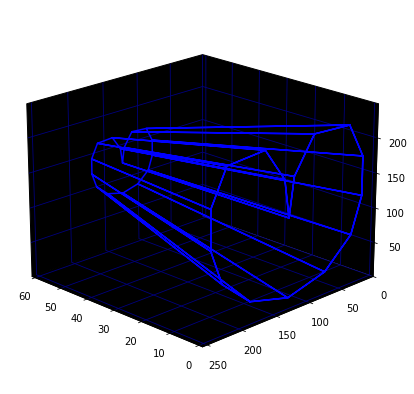

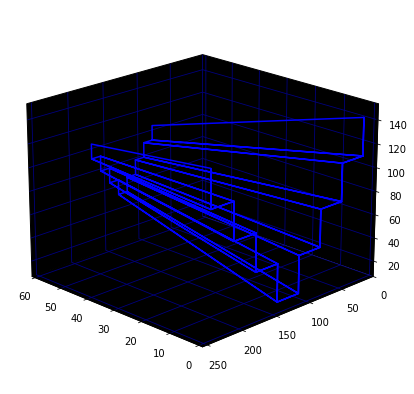

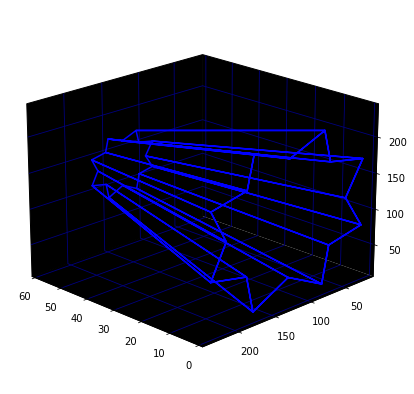

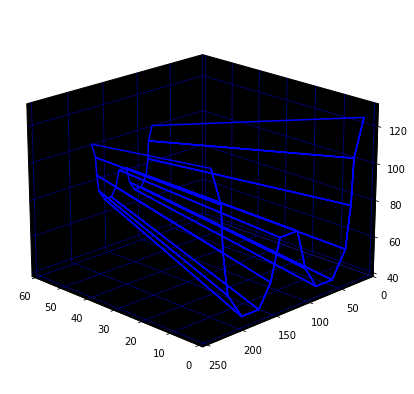

In [16]:
from well_graphs import create3DVertices,makeFullGraph,create2DVertices
x_vecs = parse_vector_data(x_data)
y_vecs = parse_vector_data(y_data)

for i in range(0,len(x_vecs)):
    xnm,xs = x_vecs[i]
    ynm,ys = y_vecs[i]
    planar = closed[i]
    vertices = list(zip(xs,ys))
    x,y,z = create3DVertices(vertices,planar)
    #print(".BYTE "+ ','.join([f"{x:02x}" if x < 129 else f"{x:03x}" for x in xs]), planar)
    #print(xs,xnm)
    #print(".BYTE "+ ','.join([f"{x:02x}" if x < 129 else f"{x:03x}" for x in ys]))
    #print(ys,ynm)
    makeFullGraph(x,y,z, f"well_graphs/{xnm}_3d.png")


# Scratchpad

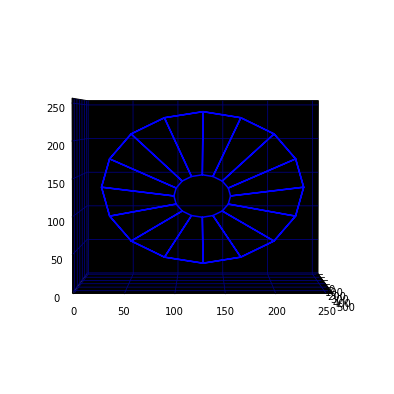

In [46]:
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SCALE_FACTOR = 0.25
projected = lambda x,m: x + OFFSET if x < m else x - OFFSET

def scale(x,y,centre):
    x_mid,y_mid = centre
    x -= x_mid
    y -= y_mid
    x *= SCALE_FACTOR
    y *= SCALE_FACTOR
    x += x_mid
    y += y_mid
    return (x,y)

def getCentre(vertices):
    x_max = max([x for x,_ in vertices])
    x_min = min([x for x,_ in vertices])
    y_max = max([y for _,y in vertices])
    y_min = min([y for _,y in vertices])
    x_mid = int((x_max + x_min)/2)
    y_mid = int((y_max + y_min)/2)
    return (x_mid,y_mid)

def create3DVertices(vertices, planar):
    # Add the first vertext to the end so we close the loop
    if planar == 0:
        vertices += [vertices[0]]
    
    centre = getCentre(vertices)
    Z = 560
    d_vs = []
    # Each pass draws a 'rectangle' between the two z co-ordinates using
    # adjacent pairs of x and y co-ordinates.
    for i in range(0,len(vertices)-1):
        x1,y1 = vertices[i]
        d_vs += [(x1,y1,0)]  # front side
        # Scale down the shape on the opposite side
        sx,sy = scale(x1,y1,centre)
        d_vs += [(sx,sy,Z)] # front side

        x2,y2 = vertices[i+1]
        # Scale down the shape on the opposite side
        sx,sy = scale(x2,y2,centre)
        d_vs += [(sx,sy,Z)] 
        d_vs += [(x2,y2,0)] # opposite side
        d_vs += [(x1,y1,0)] # front side
        d_vs += [(x2,y2,0)] # opposite side

    # invert the y values so right side up
    """
    max_y = max([y for _,y,_ in d_vs])
    y = np.array([max_y - y for _,y,_ in d_vs])
    """
    y = np.array([y for _,y,_ in d_vs])
    x = np.array([[x for x,y,z in d_vs]])
    z = np.array([[z for x,y,z in d_vs]])
    return(x,y,z)

def makeFullGraph(x, y, z, filename, titlename=""):
    #Change the Size of Graph using Figsize
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(x, y, z, color ='blue')
    ax.view_init(azim=0,elev=2,vertical_axis="y")
    ax.xaxis.set_pane_color("black")
    ax.yaxis.set_pane_color("black")
    ax.zaxis.set_pane_color("black")
    plt.savefig(filename, transparent=True,bbox_inches='tight')
    return

xnm,xs = x_vecs[0]
ynm,ys = y_vecs[0]
planar = closed[0]
vertices = list(zip(xs,ys))
x,y,z = create3DVertices(vertices,planar)
makeFullGraph(x,y,z, f"well_graphs/{xnm}.png", xnm)
